In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k2 = 1.4494
k4 = 1.0342
m = 2.47872e11
h_bar = 6.5821e-16
c = 7.856226e-6

def Vharm(x):
    return k2*(x**2)
def Vquar(x):
    return k4*(x**4) - k2*(x**2) 

a = float(input('enter lower limit of the domain: '))
b = float(input('enter upper limit of the domain: '))
N = int(input('enter number of grid points: '))

x = np.linspace(a,b,N)
h = x[1]-x[0]

T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0

V_harm = np.zeros((N-2)**2).reshape(N-2,N-2)
V_quar = np.zeros((N-2)**2).reshape(N-2,N-2)

for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V_harm[i,j]= Vharm(x[i+1])
            V_quar[i,j]= Vquar(x[i+1])
        else:
            V_harm[i,j]=0
            V_quar[i,j]=0

H_harm = -T * (c/h**2) + V_harm
H_quar = -T * (c/h**2) + V_quar

val_harm,vec_harm=np.linalg.eig(H_harm)
val_quar,vec_quar=np.linalg.eig(H_quar)
z_harm = np.argsort(val_harm)
z_harm = z_harm[0:6]
z_quar = np.argsort(val_quar)
z_quar = z_quar[0:6]
energies_harm=(val_harm[z_harm]/val_harm[z_harm][0])
energies_quar=(val_quar[z_quar]/val_quar[z_quar][0])
print("The Energy values for Harmonic Potential is:")
print(energies_harm)
print("The Energy values for Quartic Potential is:")
print(energies_quar)

enter lower limit of the domain: -1
enter upper limit of the domain: 1
enter number of grid points: 3000
The Energy values for Harmonic Potential is:
[ 1.          2.99997612  4.99990448  6.99978508  8.99961792 10.99940299]
The Energy values for Quartic Potential is:
[1.         1.         0.98109513 0.98109513 0.96225842 0.96225842]


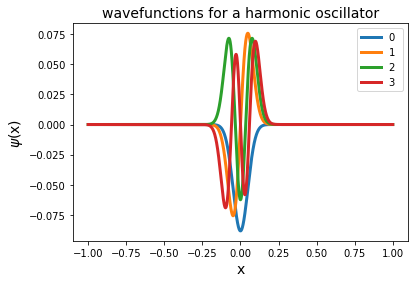

In [ ]:
for i in range(len(z_harm)):
    y_harm = []
    y_harm = np.append(y_harm,vec_harm[:,z_harm[i]])
    y_harm = np.append(y_harm,0)
    y_harm = np.insert(y_harm,0,0)
    plt.plot(x,y_harm,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)

plt.legend()
plt.title('wavefunctions for a harmonic oscillator',size=14)
plt.show()

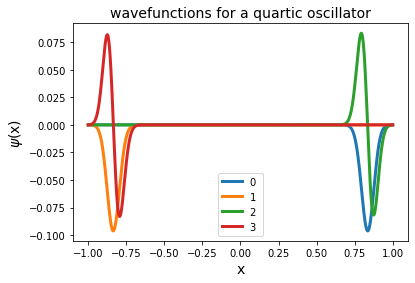

In [ ]:
for i in range(len(z_quar)):
    y_quar = []
    y_quar = np.append(y_quar,vec_quar[:,z_quar[i]])
    y_quar = np.append(y_quar,0)
    y_quar = np.insert(y_quar,0,0)
    plt.plot(x,y_quar,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)

plt.legend()
plt.title('wavefunctions for a quartic oscillator',size=14)
plt.show()